This notebook has details of the Analysis related to Artifacts in the Electra Model Trained On SNLI data.

In [1]:
pwd

'C:\\Users\\siddh\\Documents\\UT_Austin\\Fall 2023\\NLP\\NLP_FINAL'

In [5]:
import os

# Change to a mounted drive, for example, /mnt/my_drive
os.chdir('E:\\NLP\\results-20231113T134150Z-001\\results')

In [10]:
ls


 Volume in drive E is Sid_2023
 Volume Serial Number is E065-686B

 Directory of E:\NLP\results-20231113T134150Z-001\results

11/13/2023  07:42 AM    <DIR>          .
11/13/2023  07:42 AM    <DIR>          ..
11/13/2023  07:42 AM               164 eval_metrics.json
11/13/2023  07:42 AM         2,564,951 eval_predictions.jsonl
11/13/2023  07:42 AM    <DIR>          runs
               2 File(s)      2,565,115 bytes
               3 Dir(s)  1,910,744,895,488 bytes free


In [11]:
import pandas as pd
df = pd.read_json('eval_predictions.jsonl', lines=True)


In [12]:
df.head()

,premise,hypothesis,label,predicted_scores,predicted_label
0,Two women are embracing while holding to go pa...,The sisters are hugging goodbye while holding ...,1,"[-2.655517339706421, 4.35628080368042, -2.9564...",1
1,Two women are embracing while holding to go pa...,Two woman are holding packages.,0,"[3.999716997146606, -0.908149480819702, -3.110...",0
2,Two women are embracing while holding to go pa...,The men are fighting outside a deli.,2,"[-4.539059162139893, -2.610094308853149, 5.717...",2
3,"Two young children in blue jerseys, one with t...",Two kids in numbered jerseys wash their hands.,0,"[3.978000879287719, -1.148713946342468, -2.775...",0
4,"Two young children in blue jerseys, one with t...",Two kids at a ballgame wash their hands.,1,"[-3.37094497680664, 2.595725297927856, -0.2479...",1


In [71]:
len(df)

9842

1. Length Distribution Analysis: Examine the distribution of hypothesis lengths for each label. Metrics like median, mode, and range, along with visualizations like histograms or box plots, can provide insights.

In [16]:
df['word_count'] = df['hypothesis'].apply(lambda x: len(x.split()))

# Group by label and calculate the average word count
avg_word_count = df.groupby('label')['word_count'].mean()

print(avg_word_count)

label
0    6.810754
1    8.346213
2    7.396888
Name: word_count, dtype: float64


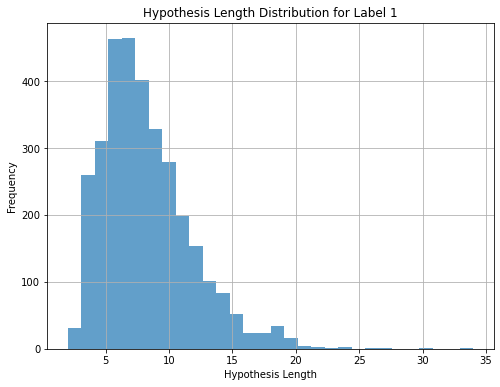

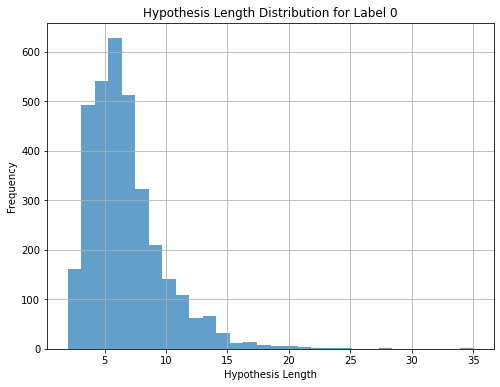

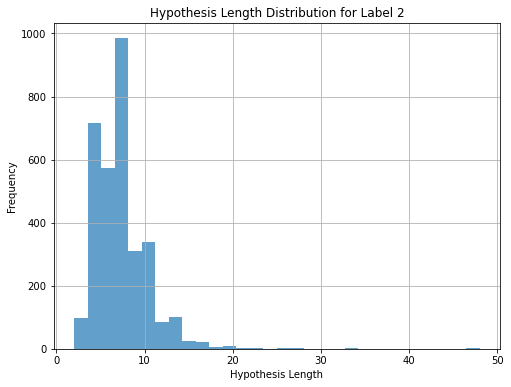

           mean  median       std  min  max  count
label                                             
0      6.810754       6  2.936772    2   35   3329
1      8.346213       8  3.364583    2   34   3235
2      7.396888       7  2.893631    2   48   3278


In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Calculate the length of each hypothesis
df['hypothesis_length'] = df['hypothesis'].apply(lambda x: len(x.split()))

# Calculate basic statistics for each label
stats_by_label = df.groupby('label')['hypothesis_length'].agg(['mean', 'median', 'std', 'min', 'max', 'count'])

# Plotting the distribution of lengths for each label
for label in df['label'].unique():
    subset = df[df['label'] == label]
    plt.figure(figsize=(8, 6))
    subset['hypothesis_length'].hist(bins=30, alpha=0.7)
    plt.title(f'Hypothesis Length Distribution for Label {label}')
    plt.xlabel('Hypothesis Length')
    plt.ylabel('Frequency')
    plt.show()

# Print statistics
print(stats_by_label)


2. Correlation Analysis: Assess the correlation between hypothesis length and label. This can reveal if there's a strong relationship between length and a particular label.

This code will calculate the Pearson correlation coefficient between the length of the hypothesis and the label. The output will be a matrix showing the correlation values, where a value close to 1 or -1 indicates a strong positive or negative correlation, respectively, and a value close to 0 indicates no significant correlation.

In [18]:
import pandas as pd

# Assuming df is your DataFrame

# Calculate the length of each hypothesis
df['hypothesis_length'] = df['hypothesis'].apply(lambda x: len(x.split()))

# Compute the correlation
correlation = df[['hypothesis_length', 'label']].corr()

print(correlation)


                   hypothesis_length     label
hypothesis_length           1.000000  0.077434
label                       0.077434  1.000000


The Pearson correlation coefficient between the hypothesis length and the label in your matrix is approximately 0.077434. This value indicates a very weak positive correlation between the two variables. In practical terms, it suggests that there is a slight tendency for the label to increase as the hypothesis length increases, but this tendency is very weak. It's important to note that correlation does not imply causation, and this weak correlation might not be statistically significant or indicative of a meaningful relationship in the context of your data.

3. Model Performance by Length: Evaluate your model's performance on subsets of data categorized by hypothesis length. This can help identify if the model performs better or worse on longer or shorter hypotheses.

In [21]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Assuming df is your DataFrame and it includes 'label' and 'predicted_label' columns

# Calculate the length of each hypothesis
df['hypothesis_length'] = df['hypothesis'].apply(lambda x: len(x.split()))

# Define length categories (you can adjust these based on your data)
length_categories = {'short': (0, 10), 'medium': (11, 20), 'long': (21, float('inf'))}

# Evaluate model performance for each length category
for category, (min_len, max_len) in length_categories.items():
    subset = df[(df['hypothesis_length'] >= min_len) & (df['hypothesis_length'] <= max_len)]
    accuracy = accuracy_score(subset['label'], subset['predicted_label'])
    print(f"Accuracy for {category} hypotheses (length between {min_len} and {max_len}): {accuracy:.2f}")


Accuracy for short hypotheses (length between 0 and 10): 0.89
Accuracy for medium hypotheses (length between 11 and 20): 0.89
Accuracy for long hypotheses (length between 21 and inf): 0.73


4. Error Analysis by Length: Analyze errors made by your model, categorized by hypothesis length. Understanding whether certain lengths are more prone to errors can indicate a length-related bias.

To perform an error analysis by hypothesis length on your DataFrame, you can follow these steps:

Identify Errors: Determine where the model's predictions differ from the actual labels.
Categorize by Hypothesis Length: Group these errors by the length of the hypothesis.
Analyze Error Frequency by Length: Calculate the frequency or proportion of errors in each length category.

In [22]:
import pandas as pd

# Assuming df is your DataFrame

# Calculate the length of each hypothesis
df['hypothesis_length'] = df['hypothesis'].apply(lambda x: len(x.split()))

# Identify where predictions are incorrect
df['error'] = df['label'] != df['predicted_label']

# Analyze errors based on hypothesis length
error_analysis = df.groupby('hypothesis_length')['error'].mean()

print(error_analysis)


hypothesis_length
2     0.052632
3     0.055351
4     0.087753
5     0.101562
6     0.103365
7     0.115409
8     0.119026
9     0.136792
10    0.112540
11    0.103837
12    0.112583
13    0.120192
14    0.082759
15    0.109091
16    0.220000
17    0.046512
18    0.100000
19    0.111111
20    0.074074
21    0.375000
22    0.000000
23    0.000000
24    0.000000
25    0.000000
26    0.000000
27    0.500000
28    0.000000
30    0.000000
34    0.500000
35    1.000000
48    1.000000
Name: error, dtype: float64


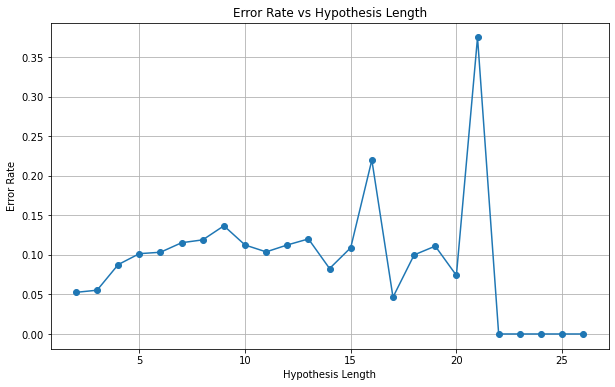

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and the previous code has been executed
error_analysis = error_analysis[:25]
# Plot the error analysis
plt.figure(figsize=(10, 6))  # You can adjust the figure size as needed
plt.plot(error_analysis.index, error_analysis.values, marker='o')  # Line plot

# Alternatively, for a bar plot, you can use:
# plt.bar(error_analysis.index, error_analysis.values)

plt.title('Error Rate vs Hypothesis Length')
plt.xlabel('Hypothesis Length')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()


5. Lexical Diversity Metrics: Calculate measures like type-token ratio (TTR) in hypotheses of different lengths. This assesses vocabulary richness and can reveal if shorter or longer hypotheses are more likely to use limited or repetitive language.

    To calculate the Type-Token Ratio (TTR), a measure of lexical diversity, for hypotheses of different lengths in your DataFrame, you can follow these steps:

    Tokenize Hypotheses: Split each hypothesis into individual words (tokens).
    Calculate TTR: For each hypothesis, calculate TTR as the ratio of unique words (types) to the total number of words (tokens).
    
This code computes the TTR for each hypothesis and then averages it across different hypothesis lengths. The output will be a series where each hypothesis length is associated with its average TTR, allowing you to observe how lexical diversity varies with the length of the hypotheses.


In [23]:
import pandas as pd
from collections import Counter

# Assuming df is your DataFrame

# Function to calculate TTR
def calculate_ttr(text):
    tokens = text.split()
    types = set(tokens)
    return len(types) / len(tokens) if tokens else 0

# Tokenize and calculate TTR for each hypothesis
df['hypothesis_length'] = df['hypothesis'].apply(lambda x: len(x.split()))
df['TTR'] = df['hypothesis'].apply(calculate_ttr)

# Group by hypothesis length and calculate average TTR
average_ttr_by_length = df.groupby('hypothesis_length')['TTR'].mean()

print(average_ttr_by_length)


hypothesis_length
2     1.000000
3     1.000000
4     1.000000
5     0.996406
6     0.995793
7     0.995289
8     0.990532
9     0.978118
10    0.972669
11    0.964088
12    0.956678
13    0.951553
14    0.934483
15    0.933939
16    0.938750
17    0.931601
18    0.914815
19    0.900585
20    0.890741
21    0.904762
22    0.943182
23    0.891304
24    0.875000
25    0.880000
26    0.807692
27    0.870370
28    0.964286
30    0.933333
34    0.838235
35    0.885714
48    0.687500
Name: TTR, dtype: float64


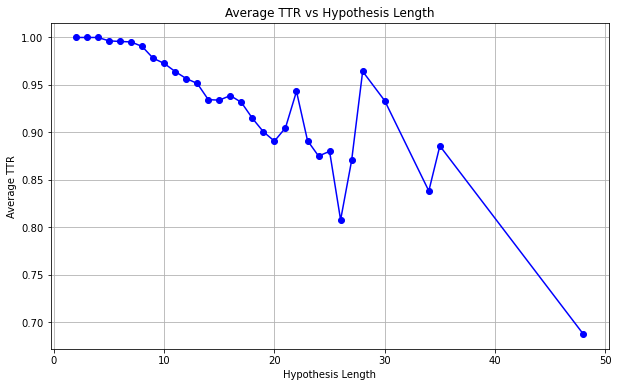

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and the previous code has been executed

# Plot the average TTR by hypothesis length
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(average_ttr_by_length.index, average_ttr_by_length.values, marker='o', color='b')  # Line plot

plt.title('Average TTR vs Hypothesis Length')
plt.xlabel('Hypothesis Length')
plt.ylabel('Average TTR')
plt.grid(True)
plt.show()



6. Information Content Analysis: Evaluate the information content or complexity of hypotheses of different lengths using metrics like Shannon entropy.



This script calculates the Shannon entropy for each hypothesis, giving a measure of its information content or complexity. Then, it averages these entropy values based on the length of the hypothesis.

In [24]:
import pandas as pd
from collections import Counter
import math

# Assuming df is your DataFrame

# Function to calculate Shannon entropy
def shannon_entropy(text):
    # Tokenize the text and create a frequency distribution
    tokens = text.split()
    if len(tokens) == 0:
        return 0
    frequency_dist = Counter(tokens)
    # Calculate entropy
    entropy = -sum((freq / len(tokens)) * math.log(freq / len(tokens), 2) for freq in frequency_dist.values())
    return entropy

# Calculate entropy for each hypothesis
df['entropy'] = df['hypothesis'].apply(shannon_entropy)

# Group by hypothesis length and calculate average entropy
df['hypothesis_length'] = df['hypothesis'].apply(lambda x: len(x.split()))
avg_entropy_by_length = df.groupby('hypothesis_length')['entropy'].mean()

print(avg_entropy_by_length)


hypothesis_length
2     1.000000
3     1.584963
4     2.000000
5     2.314741
6     2.576549
7     2.797934
8     2.980639
9     3.125667
10    3.266780
11    3.385237
12    3.495818
13    3.599177
14    3.671486
15    3.768525
16    3.871838
17    3.946533
18    3.991167
19    4.030044
20    4.082931
21    4.192854
22    4.337217
23    4.268021
24    4.296700
25    4.373661
26    4.315824
27    4.495628
28    4.735926
30    4.773557
34    4.734522
35    4.900712
48    4.811641
Name: entropy, dtype: float64


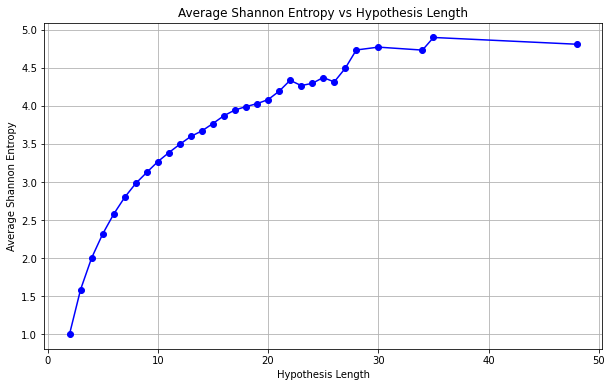

In [81]:
import matplotlib.pyplot as plt

# Assuming the previous code has been executed and df is your DataFrame

# Plot the average entropy by hypothesis length
plt.figure(figsize=(10, 6))  # You can adjust the figure size as needed
plt.plot(avg_entropy_by_length.index, avg_entropy_by_length.values, marker='o', color='b')  # Line plot

plt.title('Average Shannon Entropy vs Hypothesis Length')
plt.xlabel('Hypothesis Length')
plt.ylabel('Average Shannon Entropy')
plt.grid(True)
plt.show()


7. Cross-Validation Across Lengths: Perform cross-validation where you train on hypotheses of certain lengths and test on others. This can reveal how dependent the model's performance is on the length of the hypotheses.

Split the Data Based on Hypothesis Length: Create separate datasets for training and testing based on the length of the hypotheses.
Train the Model: Train your model on one subset of data (e.g., shorter hypotheses).
Test the Model: Test the model on a different subset of data (e.g., longer hypotheses).
Evaluate Performance: Assess the model's performance on the test set.



In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#from your_model import YourModel  # Replace with your actual model


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Example model class
class BasicNLIModel:
    def __init__(self):
        # Using TF-IDF for text vectorization and Logistic Regression as the classifier
        #self.model = make_pipeline(TfidfVectorizer(), LogisticRegression())
        self.model = make_pipeline(TfidfVectorizer(), LogisticRegression(max_iter=1000))

    def fit(self, X, y):
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)

# Example usage
# Assuming df is your DataFrame
model = BasicNLIModel()

# Prepare your data (example splitting, you should adjust according to your needs)
train_data = df.sample(frac=0.8, random_state=25)
test_data = df.drop(train_data.index)

# Train the model
model.fit(train_data['hypothesis'], train_data['label'])

# Test the model
predictions = model.predict(test_data['hypothesis'])

# Evaluate the model
accuracy = accuracy_score(test_data['label'], predictions)
print(f'Accuracy on test data: {accuracy}')


# Assuming df is your DataFrame

# Calculate the length of each hypothesis
df['hypothesis_length'] = df['hypothesis'].apply(lambda x: len(x.split()))

# Define a length threshold to split the data (adjust as needed)
length_threshold = 10

# Splitting the dataset
train_data = df[df['hypothesis_length'] <= length_threshold]
test_data = df[df['hypothesis_length'] > length_threshold]

# Assuming 'YourModel' is your ML model and it has fit and predict methods
model = BasicNLIModel()

# Train the model
model.fit(train_data['hypothesis'], train_data['label'])

# Test the model
predictions = model.predict(test_data['hypothesis'])

# Evaluate the model
accuracy = accuracy_score(test_data['label'], predictions)
print(f'Accuracy on test data: {accuracy}')


Accuracy on test data: 0.5599593495934959
Accuracy on test data: 0.5434628975265018



The accuracy scores you provided indicate the performance of your model on the test data. The first score, 0.5599, suggests that the model correctly predicted the label approximately 56% of the time in one scenario (likely on one subset of the data). The second score, 0.5435, indicates a slightly lower accuracy of about 54% in a different scenario or subset.

These scores suggest moderate performance but also indicate there is room for improvement. In the context of NLI tasks, particularly if dealing with complex or nuanced data, these accuracy levels might not be sufficient. The results could imply that the model struggles with certain aspects of the data or that a more complex model might be necessary to capture the intricacies of natural language inference.

In [33]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame

# Split the data into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Extract texts and labels for training and validation sets
train_texts = train_df['hypothesis'].tolist()
train_labels = train_df['label'].tolist()
val_texts = val_df['hypothesis'].tolist()
val_labels = val_df['label'].tolist()

In [37]:
!pip install --upgrade typing_extensions

In [40]:
df.head()


,premise,hypothesis,label,predicted_scores,predicted_label,word_count,hypothesis_length,error,TTR,entropy
0,Two women are embracing while holding to go pa...,The sisters are hugging goodbye while holding ...,1,"[-2.655517339706421, 4.35628080368042, -2.9564...",1,14,14,False,1.0,3.807355
1,Two women are embracing while holding to go pa...,Two woman are holding packages.,0,"[3.999716997146606, -0.908149480819702, -3.110...",0,5,5,False,1.0,2.321928
2,Two women are embracing while holding to go pa...,The men are fighting outside a deli.,2,"[-4.539059162139893, -2.610094308853149, 5.717...",2,7,7,False,1.0,2.807355
3,"Two young children in blue jerseys, one with t...",Two kids in numbered jerseys wash their hands.,0,"[3.978000879287719, -1.148713946342468, -2.775...",0,8,8,False,1.0,3.000000
4,"Two young children in blue jerseys, one with t...",Two kids at a ballgame wash their hands.,1,"[-3.37094497680664, 2.595725297927856, -0.2479...",1,8,8,False,1.0,3.000000


In [43]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import string

nltk.download('stopwords')

# Assuming df is your DataFrame

# Tokenize the hypotheses
df['tokens'] = df['hypothesis'].apply(word_tokenize)

# Remove stopwords and punctuation from tokens
stop_words = set(stopwords.words('english') + list(string.punctuation))
df['filtered_tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

# Function to count words for each label
def count_words(group):
    # Concatenate all token lists from the group into a single list
    all_tokens = sum(group['filtered_tokens'], [])
    # Count the frequencies of each token in the list
    return Counter(all_tokens)

# Group by 'label' and apply the count_words function
word_counts_by_label = df.groupby('label').apply(count_words)

# Display the most common words for each label
for label, counter in word_counts_by_label.iteritems():
    print(f"Label {label}:")
    print(counter.most_common(20))  # Adjust number as needed for 'few words'


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Label 0:
[('man', 677), ('people', 354), ('woman', 341), ('outside', 236), ('Two', 225), ('person', 188), ('playing', 188), ('girl', 159), ('wearing', 147), ('men', 143), ('People', 139), ('boy', 138), ('dog', 120), ('group', 113), ('sitting', 107), ('walking', 103), ('standing', 97), ('child', 95), ('water', 91), ('near', 88)]
Label 1:
[('man', 674), ('woman', 337), ('people', 222), ('Two', 172), ('girl', 162), ('playing', 150), ('men', 144), ('boy', 136), ('dog', 127), ('person', 106), ('group', 101), ('wearing', 99), ('young', 91), ('women', 88), ('child', 78), ('outside', 78), ('walking', 76), ('two', 73), ('People', 70), ('game', 65)]
Label 2:
[('man', 702), ('woman', 387), ('Two', 219), ('people', 209), ('men', 185), ('playing', 174), ('sitting', 173), ('girl', 172), ('dog', 147), ('boy', 147), ('wearing', 100), ('women', 97), ('standing', 96), ('sleeping', 95), ('group', 95), ('young', 93), ('person', 88), ('running', 80), ('eating', 80), ('two', 79)]


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd

# Assuming df is your DataFrame

# Label encoding to ensure that labels are numeric if they aren't already
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Fit and transform the hypotheses
tfidf_matrix = tfidf.fit_transform(df['hypothesis'])

# Convert to a DataFrame
feature_names = tfidf.get_feature_names()  # Use get_feature_names for older versions
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Add the label column back to the tfidf DataFrame
tfidf_df['label'] = df['label']

# Function to get top n TF-IDF values for each label
def top_tfidf_feats(row, features, top_n=10):
    # Get the indices sorted by TF-IDF value
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids if row[i] > 0]
    df = pd.DataFrame(top_feats, columns=['feature', 'tfidf'])
    return df

# Function to find top words for each label
def top_words_by_label(tfidf_df, features, top_n=10):
    labels_feats = {}
    for label in tfidf_df['label'].unique():
        # Create a mask for the current label
        label_mask = (tfidf_df['label'] == label)
        # Drop the label column and sum the remaining TF-IDF scores
        label_sum = tfidf_df[label_mask].drop('label', axis=1).sum(axis=0)
        # Get the top n features for the current label
        top_feats = top_tfidf_feats(label_sum.values, features, top_n)
        labels_feats[label] = top_feats
    return labels_feats

# Get the top words for each label
top_words = top_words_by_label(tfidf_df, feature_names)

# Display the most distinct words for each label
for label, df in top_words.items():
    print(f"Label {le.inverse_transform([label])[0]}:")
    print(df)


Label 1:
   feature       tfidf
0      man  141.479304
1    woman   91.384893
2   people   78.544782
3     girl   52.459389
4  playing   49.671459
5      men   49.378403
6      boy   44.549270
7      dog   44.091786
8   person   39.841724
9    women   37.308379
Label 0:
   feature       tfidf
0      man  182.628731
1   people  173.966261
2  outside  132.079352
3    woman  113.261794
4  playing   79.939482
5   person   79.133236
6      men   63.815060
7     girl   62.228584
8  walking   57.527397
9  wearing   56.281722
Label 2:
    feature       tfidf
0       man  167.013023
1     woman  113.543660
2    people   86.001586
3   sitting   73.993240
4       men   68.182541
5   playing   64.684591
6      girl   61.154295
7  sleeping   57.839003
8       dog   57.814826
9       boy   53.954249


In [50]:
import pandas as pd
df = pd.read_json('eval_predictions.jsonl', lines=True)


In [53]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from collections import Counter

# Assuming df is your DataFrame

# Tokenize the hypotheses and filter stopwords and punctuation
stop_words = set(stopwords.words('english') + list(string.punctuation))
df['filtered_tokens'] = df['hypothesis'].apply(
    lambda x: [word.lower() for word in word_tokenize(x) if word.lower() not in stop_words]
)

# Find unique words for each label
unique_words_by_label = {label: set() for label in df['label'].unique()}
for label, group in df.groupby('label'):
    other_labels_tokens = df[df['label'] != label]['filtered_tokens'].sum()
    unique_words = set(sum(group['filtered_tokens'], [])) - set(other_labels_tokens)
    unique_words_by_label[label] = unique_words

# Count the frequency of unique words within each label
unique_word_counts_by_label = {
    label: Counter(
        [word for word in sum(df[df['label'] == label]['filtered_tokens'], []) if word in unique_words]
    )
    for label, unique_words in unique_words_by_label.items()
}

# Display the most common distinct words for each label
for label, counter in unique_word_counts_by_label.items():
    print(f"Label {label} unique words:")
    print(counter.most_common(20))  # Adjust number as needed for 'few words'


Label 1 unique words:
[('vacation', 13), ('celebrating', 10), ('happily', 10), ('halloween', 9), ('tour', 7), ('last', 7), ('meet', 6), ('discuss', 5), ('upcoming', 5), ('likes', 5), ('members', 5), ('important', 5), ('tournament', 5), ('paid', 4), ('related', 4), ('boating', 4), ('plans', 4), ('beating', 4), ('spot', 4), ('soon', 4)]
Label 0 unique words:
[('opposing', 5), ('physical', 4), ('liquid', 4), ('photographing', 3), ('motion', 3), ('autumn', 3), ('motorcyle', 3), ('accessories', 3), ('speaks', 3), ('hills', 3), ('stumbles', 2), ('deere', 2), ('worked', 2), ('laboratory', 2), ('involved', 2), ('worship', 2), ('physically', 2), ('movement', 2), ('podium', 2), ('blows', 2)]
Label 2 unique words:
[('nobody', 53), ('sleep', 12), ('nothing', 11), ('anything', 8), ('napping', 7), ('mars', 6), ('sofa', 6), ('spaceship', 5), ('porch', 5), ('ignoring', 5), ('cow', 5), ('ordering', 5), ('nude', 5), ('throw', 4), ('sound', 4), ('sheep', 4), ('highway', 4), ('library', 4), ('sing', 4), (

In [82]:
# Display the most common distinct words for each label
for label, counter in unique_word_counts_by_label.items():
    print(f"Label {label} unique words:")
    print(len(counter))  # Adjust number as needed for 'few words'

Label 1 unique words:
1264
Label 0 unique words:
489
Label 2 unique words:
956


In [83]:
import pandas as pd

# Assuming df is your DataFrame and 'hypothesis' is the column of interest

# Tokenize each hypothesis into words
# We'll split each hypothesis on spaces assuming they are already cleaned (punctuation, lowercased, etc.)
words = df['hypothesis'].str.split().explode()

# Now, 'words' is a Series where each row is a single word from the hypothesis
# We use a set to find unique words
unique_words = set(words)

# The length of the set gives the total number of unique words
total_unique_words = len(unique_words)

print("Total number of unique words in the 'hypothesis' column:", total_unique_words)


Total number of unique words in the 'hypothesis' column: 6838


In [49]:
df.columns

Index(['feature', 'tfidf'], dtype='object')

In [55]:
# Assuming unique_word_counts_by_label contains the Counter objects for each label as before

# Convert the Counter objects to lists of distinct words for each label
distinct_words_by_label = {
    label: list(counter.keys()) for label, counter in unique_word_counts_by_label.items()
}

# Filter the DataFrame for correct predictions
correct_predictions = df[df['label'] == df['predicted_label']]

# Find hypotheses with distinct words that have correct predictions
hypotheses_with_distinct_words = {label: [] for label in distinct_words_by_label}

for label, words in distinct_words_by_label.items():
    # Filter correct predictions for the current label
    correct_predictions_label = correct_predictions[correct_predictions['label'] == label]
    
    # For each hypothesis, check if it contains any of the distinct words
    for idx, row in correct_predictions_label.iterrows():
        hypothesis_tokens = set(row['filtered_tokens'])
        if any(word in hypothesis_tokens for word in words):
            # If the hypothesis contains any distinct word, add it to the list
            hypotheses_with_distinct_words[label].append(row['hypothesis'])

# Display the hypotheses with distinct words for each label with correct predictions
for label, hypotheses in hypotheses_with_distinct_words.items():
    print(f"Hypotheses for label {label} with correct predictions and distinct words:")
    for hypothesis in hypotheses:
        print(hypothesis)
    print("\n\n\n")  # Newline for better readability


Hypotheses for label 1 with correct predictions and distinct words:
The sisters are hugging goodbye while holding to go packages after just eating lunch.
Two kids at a ballgame wash their hands.
A man selling donuts to a customer during a world exhibition event while people wait in line behind him.
A man is repainting a garage
A child is reaching to touch the propeller out of curiosity.
Women are celebrating at a bar.
A white chihuahua mix with long curly hair is jumping to catch a red and green toy bone.
A man plays on a golf course to relax.
Onlookers are impressed by the trick.
A taxi SUV races to pick up some clients while a man walks peacefully in the other direction.
A man is taking photos while on tour in nyc
A lady is participating in a talent show.
Boy dressed in blue carrying toy to a toybox.
The woman is writing a grocery list.
A girl is gaining momentum to flip off the swing
The man is trying to pick out what cereal to choose.
The man is reading tips on how to be a better b

In [56]:
# Assuming unique_word_counts_by_label contains the Counter objects for each label as before

# Convert the Counter objects to lists of distinct words for each label
distinct_words_by_label = {
    label: list(counter.keys()) for label, counter in unique_word_counts_by_label.items()
}

# Filter the DataFrame for correct predictions
correct_predictions = df[df['label'] == df['predicted_label']]

# Find hypotheses with distinct words that have correct predictions
hypotheses_with_distinct_words_count = {label: 0 for label in distinct_words_by_label}

for label, words in distinct_words_by_label.items():
    # Filter correct predictions for the current label
    correct_predictions_label = correct_predictions[correct_predictions['label'] == label]
    
    # For each hypothesis, check if it contains any of the distinct words
    for idx, row in correct_predictions_label.iterrows():
        hypothesis_tokens = set(row['filtered_tokens'])
        if any(word in hypothesis_tokens for word in words):
            # If the hypothesis contains any distinct word, increment the count
            hypotheses_with_distinct_words_count[label] += 1

# Display the count of hypotheses with distinct words for each label with correct predictions
for label, count in hypotheses_with_distinct_words_count.items():
    print(f"Count of hypotheses for label {label} with correct predictions and distinct words: {count}")


Count of hypotheses for label 1 with correct predictions and distinct words: 1056
Count of hypotheses for label 0 with correct predictions and distinct words: 365
Count of hypotheses for label 2 with correct predictions and distinct words: 899


In [57]:
len(df)

9842

In [58]:
# Assuming df is the DataFrame and distinct_words_by_label contains the distinct words for each label

# Find the common words by identifying words not in the distinct words sets
all_words = set(word for words in df['filtered_tokens'] for word in words)
common_words = all_words - set(word for words_list in distinct_words_by_label.values() for word in words_list)

# Filter the DataFrame for incorrect predictions
incorrect_predictions = df[df['label'] != df['predicted_label']]

# Function to find examples with common words and incorrect predictions
def find_examples_with_common_words(incorrect_predictions, common_words):
    examples = []
    for idx, row in incorrect_predictions.iterrows():
        hypothesis_tokens = set(row['filtered_tokens'])
        if any(word in hypothesis_tokens for word in common_words):
            examples.append((row['hypothesis'], row['label'], row['predicted_label']))
    return examples

# Get the examples
examples = find_examples_with_common_words(incorrect_predictions, common_words)

# Print some examples
for hypothesis, label, predicted_label in examples[:5]:  # Adjust the number for the desired amount of examples
    print(f"Hypothesis: {hypothesis}")
    print(f"Actual Label: {label}")
    print(f"Predicted Label: {predicted_label}")
    print("\n")  # Newline for better readability


Hypothesis: Two kids in jackets walk to school.
Actual Label: 2
Predicted Label: 1


Hypothesis: A woman is doing a cartwheel and falls on her head.
Actual Label: 2
Predicted Label: 1


Hypothesis: Men are riding bicycles on the street.
Actual Label: 1
Predicted Label: 0


Hypothesis: People are waiting to see a movie.
Actual Label: 2
Predicted Label: 1


Hypothesis: A crowd is in front of a camera
Actual Label: 1
Predicted Label: 0




is_error           False  True 
contains_negation              
False               8719   1062
True                  56      5


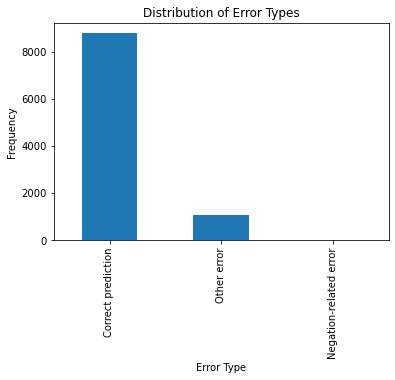

Error analysis for label 1:
Other error               442
Negation-related error      2
Name: error_type, dtype: int64




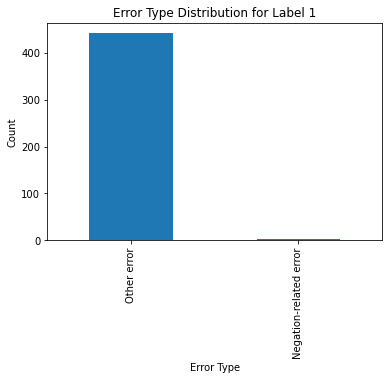

Error analysis for label 0:
Other error               304
Negation-related error      1
Name: error_type, dtype: int64




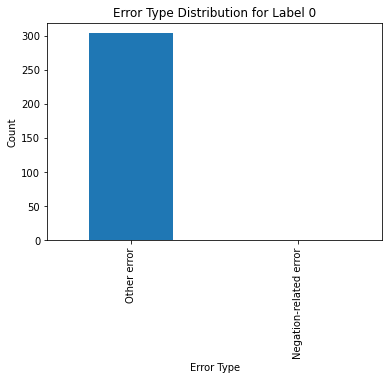

Error analysis for label 2:
Other error               316
Negation-related error      2
Name: error_type, dtype: int64




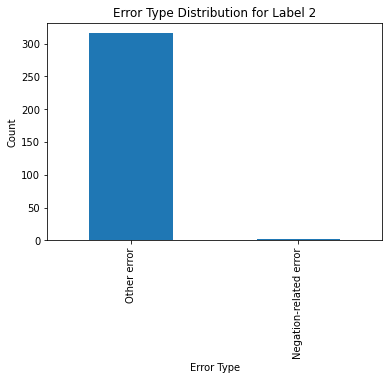

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the following columns: 'hypothesis', 'label', 'predicted_label'

# Step 1: Error Analysis
# Add a new column to the DataFrame that flags incorrect predictions
df['is_error'] = df['label'] != df['predicted_label']

# Step 2: Classify Errors
# Categorize errors based on the hypothesis content
df['contains_negation'] = df['hypothesis'].apply(lambda x: 'not' in x.lower().split()  or 'never' in x.lower().split())

# Create a crosstab to summarize the errors
error_crosstab = pd.crosstab(index=df['contains_negation'], columns=df['is_error'])
print(error_crosstab)

# Step 3: Rule Definition
# Define a function to classify errors into general classes based on the rules you create
def classify_error(row):
    if row['contains_negation'] and row['is_error']:
        return 'Negation-related error'
    # Add more rules here
    elif row['is_error']:
        return 'Other error'
    else:
        return 'Correct prediction'

df['error_type'] = df.apply(classify_error, axis=1)

# Step 4: Data Visualization
# Plot the distribution of error types
error_distribution = df['error_type'].value_counts()
error_distribution.plot(kind='bar')
plt.title('Distribution of Error Types')
plt.xlabel('Error Type')
plt.ylabel('Frequency')
plt.show()

# More detailed error analysis based on the label
for label in df['label'].unique():
    label_errors = df[(df['label'] == label) & (df['is_error'])]
    print(f"Error analysis for label {label}:")
    print(label_errors['error_type'].value_counts())
    print("\n")
    
    # Plotting error type distribution for each label
    label_errors['error_type'].value_counts().plot(kind='bar', title=f'Error Type Distribution for Label {label}')
    plt.xlabel('Error Type')
    plt.ylabel('Count')
    plt.show()

# Further analysis with statistics
# This would be an extension to the visual analysis with more sophisticated statistical methods


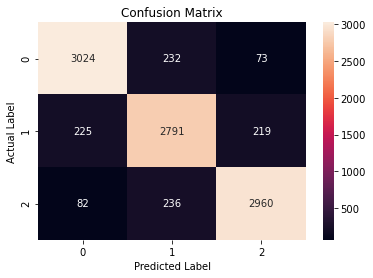

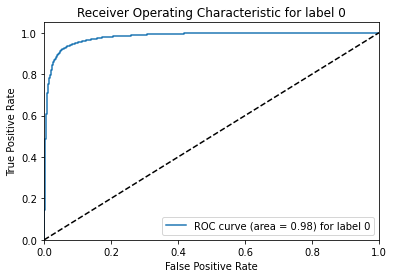

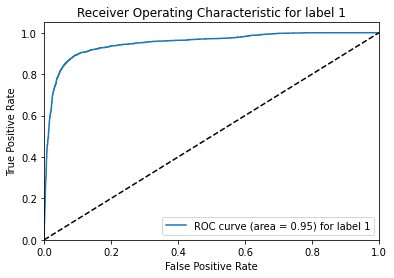

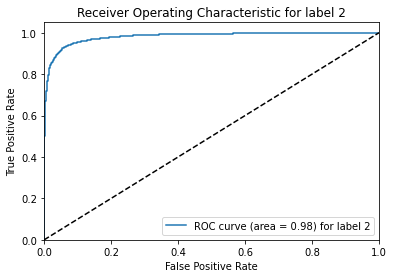

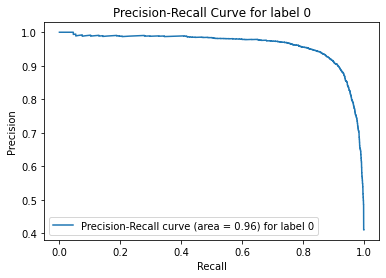

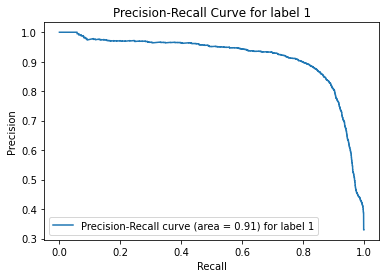

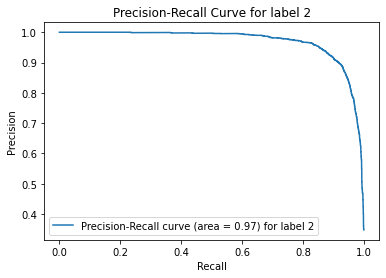

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming df is your DataFrame and it has the 'predicted_scores' as a list of scores

# Binarize the labels for ROC curve calculation
y_true = label_binarize(df['label'], classes=[0, 1, 2])
n_classes = y_true.shape[1]

# Extract the scores for the true class for each record
y_scores = np.array([scores[label] for scores, label in zip(df['predicted_scores'], df['label'])])

# Confusion Matrix
cm = confusion_matrix(df['label'], df['predicted_label'])
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Since we have a multi-class classification we will calculate the metrics for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], [score[i] for score in df['predicted_scores']])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for label {i}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for label ' + str(i))
    plt.legend(loc="lower right")
    plt.show()

# Precision-Recall Curve for each class
precision = dict()
recall = dict()
pr_auc = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_true[:, i], [score[i] for score in df['predicted_scores']])
    pr_auc[i] = auc(recall[i], precision[i])

# Plot all Precision-Recall curves
for i in range(n_classes):
    plt.figure()
    plt.plot(recall[i], precision[i], label=f'Precision-Recall curve (area = {pr_auc[i]:.2f}) for label {i}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve for label ' + str(i))
    plt.legend(loc="lower left")
    plt.show()


In [65]:
import pandas as pd

# Assuming df is your DataFrame

# Identifying specific error examples
incorrect_predictions = df[df['label'] != df['predicted_label']]
specific_errors = incorrect_predictions.sample(5)  # Adjust the number as needed

# Analyzing general classes of mistakes
df['contains_negation'] = df['hypothesis'].apply(lambda x: 'not' in x.lower() or 'never' in x.lower())
negation_errors = df[df['contains_negation'] & (df['label'] != df['predicted_label'])]

# Example: Counting errors with negations
negation_error_count = negation_errors.shape[0]

# Further analysis can be done similarly for other error types


In [68]:
import pandas as pd

# Assuming df is your DataFrame with columns 'premise', 'hypothesis', 'label', 'predicted_label'

# Find instances where the hypothesis contradicts the premise but the model predicted entailment
contradiction_predicted_as_entailment = df[(df['label'] == 2) & (df['predicted_label'] == 0)]
entailment_predicted_as_contradiction = df[(df['label'] == 0) & (df['predicted_label'] == 2)]

# Extract a few examples of each error type
contradiction_errors = contradiction_predicted_as_entailment.sample(20)  # Adjust the number as needed
entailment_errors = entailment_predicted_as_contradiction.sample(20)  # Adjust the number as needed

# Display the examples for analysis
print("Contradiction predicted as Entailment:")
for index, row in contradiction_errors.iterrows():
    print(f"Premise: {row['premise']}")
    print(f"Hypothesis: {row['hypothesis']}")
    print(f"Actual Label: {row['label']} (Contradiction)")
    print(f"Predicted Label: {row['predicted_label']} (Entailment)\n")

print("Entailment predicted as Contradiction:")
for index, row in entailment_errors.iterrows():
    print(f"Premise: {row['premise']}")
    print(f"Hypothesis: {row['hypothesis']}")
    print(f"Actual Label: {row['label']} (Entailment)")
    print(f"Predicted Label: {row['predicted_label']} (Contradiction)\n")


Contradiction predicted as Entailment:
Premise: Big hairy dog chews on a bone while lying on a furry toy.
Hypothesis: The dog is laying on a pointy object
Actual Label: 2 (Contradiction)
Predicted Label: 0 (Entailment)

Premise: Inside the igloo, the young man gets ready for his overnight stay.
Hypothesis: The young man gets ready to leave.
Actual Label: 2 (Contradiction)
Predicted Label: 0 (Entailment)

Premise: It's Summer time and two girls play with bubbles near a boat dock.
Hypothesis: They are on the boat dock.
Actual Label: 2 (Contradiction)
Predicted Label: 0 (Entailment)

Premise: A young man trying to buy a car from his dealer after his old car was towed away by police.
Hypothesis: A person renting a vehicle.
Actual Label: 2 (Contradiction)
Predicted Label: 0 (Entailment)

Premise: Two children lined up outside in a grassy field with their arms stretched out to the sides.
Hypothesis: Two kids were in a field with their arms down.
Actual Label: 2 (Contradiction)
Predicted Labe

In [69]:
import pandas as pd

# Assuming df is your DataFrame with columns 'premise', 'hypothesis', 'label', 'predicted_label'

# Find instances where the actual label is 'Entailment' but predicted as 'Neutral'
entailment_predicted_as_neutral = df[(df['label'] == 0) & (df['predicted_label'] == 1)]

# Find instances where the actual label is 'Neutral' but predicted as 'Entailment'
neutral_predicted_as_entailment = df[(df['label'] == 1) & (df['predicted_label'] == 0)]

# Extract a few examples of each error type
entailment_neutral_errors = entailment_predicted_as_neutral.sample(5)  # Adjust the number as needed
neutral_entailment_errors = neutral_predicted_as_entailment.sample(5)  # Adjust the number as needed

# Display the examples for analysis
print("Entailment predicted as Neutral:")
for index, row in entailment_neutral_errors.iterrows():
    print(f"Premise: {row['premise']}")
    print(f"Hypothesis: {row['hypothesis']}")
    print(f"Actual Label: {row['label']} (Entailment)")
    print(f"Predicted Label: {row['predicted_label']} (Neutral)\n")

print("Neutral predicted as Entailment:")
for index, row in neutral_entailment_errors.iterrows():
    print(f"Premise: {row['premise']}")
    print(f"Hypothesis: {row['hypothesis']}")
    print(f"Actual Label: {row['label']} (Neutral)")
    print(f"Predicted Label: {row['predicted_label']} (Entailment)\n")


Entailment predicted as Neutral:
Premise: A firefighter, in full uniform, looks off into the distance.
Hypothesis: This firefighter is on duty.
Actual Label: 0 (Entailment)
Predicted Label: 1 (Neutral)

Premise: Man in gray zippered jacket and red shirt pets a brown dog and holds a young girl in pink shirt, while a woman next to him holds an infant boy and a gray dog.
Hypothesis: A man holds a small child while petting his dog with his girlfriend is holding her son and her dog.
Actual Label: 0 (Entailment)
Predicted Label: 1 (Neutral)

Premise: A horse and rider on a steeplechase course.
Hypothesis: A jockey is riding a horse.
Actual Label: 0 (Entailment)
Predicted Label: 1 (Neutral)

Premise: A boy poses in karate form and uniform.
Hypothesis: A karate student poses in his gi
Actual Label: 0 (Entailment)
Predicted Label: 1 (Neutral)

Premise: A man wandering in the desert as the clouds roll in.
Hypothesis: A man wonders in the desert.
Actual Label: 0 (Entailment)
Predicted Label: 1 (N

In [70]:
import pandas as pd

# Assuming df is your DataFrame with columns 'premise', 'hypothesis', 'label', 'predicted_label'

# Find instances where the actual label is 'Neutral' but predicted as 'Contradiction'
neutral_predicted_as_contradiction = df[(df['label'] == 1) & (df['predicted_label'] == 2)]

# Find instances where the actual label is 'Contradiction' but predicted as 'Neutral'
contradiction_predicted_as_neutral = df[(df['label'] == 2) & (df['predicted_label'] == 1)]

# Extract a few examples of each error type
neutral_contradiction_errors = neutral_predicted_as_contradiction.sample(5)  # Adjust the number as needed
contradiction_neutral_errors = contradiction_predicted_as_neutral.sample(5)  # Adjust the number as needed

# Display the examples for analysis
print("Neutral predicted as Contradiction:")
for index, row in neutral_contradiction_errors.iterrows():
    print(f"Premise: {row['premise']}")
    print(f"Hypothesis: {row['hypothesis']}")
    print(f"Actual Label: {row['label']} (Neutral)")
    print(f"Predicted Label: {row['predicted_label']} (Contradiction)\n")

print("Contradiction predicted as Neutral:")
for index, row in contradiction_neutral_errors.iterrows():
    print(f"Premise: {row['premise']}")
    print(f"Hypothesis: {row['hypothesis']}")
    print(f"Actual Label: {row['label']} (Contradiction)")
    print(f"Predicted Label: {row['predicted_label']} (Neutral)\n")


Neutral predicted as Contradiction:
Premise: Two entertainers on a stage performing acrobatic moves.
Hypothesis: Two entertainers are performing acrobatics in a car.
Actual Label: 1 (Neutral)
Predicted Label: 2 (Contradiction)

Premise: A race car sits in the pits.
Hypothesis: The car is being repaired.
Actual Label: 1 (Neutral)
Predicted Label: 2 (Contradiction)

Premise: Man and a woman in a red dress dancing on stage in front of other dancers and a metro PCS sign.
Hypothesis: A gentleman and his date are at the Metro PCS theather.
Actual Label: 1 (Neutral)
Predicted Label: 2 (Contradiction)

Premise: A young child brushes his or her teeth while holding a remote.
Hypothesis: The young boy is in the bathroom.
Actual Label: 1 (Neutral)
Predicted Label: 2 (Contradiction)

Premise: A girl with a cigarette in hand and a guy with a green hat wave at the camera.
Hypothesis: The girl is smoking a Camel.
Actual Label: 1 (Neutral)
Predicted Label: 2 (Contradiction)

Contradiction predicted as 